In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
stock_data = yf.download('AAPL', start='2023-01-01')


/tmp/ipython-input-3688346507.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2023-01-01')
[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head(10)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421242,126.136075,123.164572,125.504260,80962700
2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
2023-01-09,128.485641,131.703962,128.228972,128.801557,70790800
2023-01-10,129.058212,129.581433,126.481589,128.594221,63896200
2023-01-11,131.782944,131.802677,128.791692,129.571583,69458900
2023-01-12,131.703979,132.543101,129.759170,132.167970,71379600


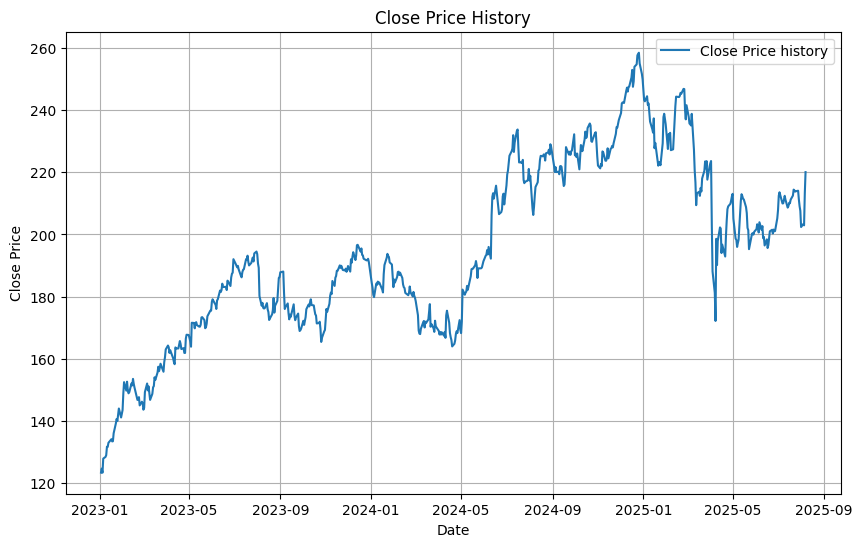

In [3]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## AR Model

In [4]:
## making the data stationary before model fitting
apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data  = apple_price_stationary[:-30],  apple_price_stationary[-30:]

In [5]:
## fitting the autoregressive model (AR) to the training data
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_data, lags=30)
model_fit = model.fit()


## make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) +  len(test_data) - 1,
    dynamic=False

)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

### AR model with lag=30

### Evaluating..

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#1. Mean absolute error(MAE)
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


#2. Mean squared error(MSE)
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse}")


#3. Root mean squared error(RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


#4. Mean absolute percentage error (MAPE)
mape = np.mean(np.abs((test_data['AAPL'].values - predictions.values) / test_data['AAPL'].values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


## aic and bic  ...###  check which model is better
aic =  model_fit.aic
bic = model_fit.bic
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Mean Absolute Error (MAE): 2.0872708613811617
Mean Squared Error (MSE): 9.134742090009505
Root Mean Squared Error (RMSE): 3.0223735854472897
Mean Absolute Percentage Error (MAPE): 159.22276455075746
AIC: 3096.7200770847103
BIC: 3236.8839982655027


### AR model with lag=20

In [12]:
model = AutoReg(train_data, lags=20)
model_fit = model.fit()


## making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) +  len(test_data) - 1,
    dynamic=False
)



#1. Mean absolute error(MAE)
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


#2. Mean squared error(MSE)
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse}")


#3. Root mean squared error(RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


#4. Mean absolute percentage error (MAPE)
mape = np.mean(np.abs((test_data['AAPL'].values - predictions.values) / test_data['AAPL'].values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


## aic and bic  ...###  check which model is better
aic =  model_fit.aic
bic = model_fit.bic
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Mean Absolute Error (MAE): 1.9818757934121292
Mean Squared Error (MSE): 8.842580426438285
Root Mean Squared Error (RMSE): 2.9736476634662496
Mean Absolute Percentage Error (MAPE): 112.90148510662176
AIC: 3141.8321867998156
BIC: 3238.564639214571


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

### end_here!